In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
!unzip archive.zip


Archive:  archive.zip
  inflating: README.txt              
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: tags.csv                


In [3]:
import zipfile
import io
import pandas as pd

# Specify the uploaded zip file name
zip_file_name = 'archive.zip'

# Read a specific file from the zip without extracting
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    # Assuming 'example.csv' is the file you want to read
    csv_file_name = 'ratings.csv'

    # Read the CSV file into a DataFrame
    with zip_ref.open(csv_file_name) as file:
        df = pd.read_csv(file)

# Display the first few rows of the DataFrame
print(df.head())


   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [10]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [33]:
df.shape

(100836, 5)

In [11]:
# Extract unique user and item counts
num_users = df['userId'].nunique()
num_items = df['movieId'].nunique()

In [12]:
df = df.drop('timestamp', axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [17]:
print("Unique users:", train_data['userId'].unique())
print("Unique movies:", train_data['movieId'].unique())


Unique users: [221 229 415  76 487 509 362 263 136 554 280  51  24 453 528 597 133 301
 103 294 419 219 484 599 552 141 125  47 179 239 105 603 177 307 288 520
 525 610 473 565 567 414 305 606  20  66 112 137 391  29  89 369 274 368
 266 249 132 398 314 382 490 586  40 570  41  18 564 543 405 474 271 318
 275 365 428  59 372 425 200 139 236  84 514  97 444 483 329  86 577 101
  93 477 195 559 270 282 380 408 285 325 410 260  23 178   7 331  68 122
 104 336  62 412 413 135 186 495 330  14 517 290 605 561 448 376 455 328
 387  35 480 417 409 381 140 352   8 254 489  88 299 363  42 190 593 182
  74 522 256  91   6 202 466 117 608 339 462  19 232 337 156 607 241 527
  57  95  21  81 594 199 482 467 539 153 361 250  28 499 534 216 556 590
 298 292 441 434 193 385 479  39 111 563 226  50 165 377 481 475  99 180
 169 404 359 478 357 223 562 580 493 596 235 144 313 312 560 392 129 204
 167 573 212 587 457 171 259 306 131 146 170 160  44  87 601 287 109 143
 566 584 515 437 100 469 511 354 152 

In [18]:
df.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [19]:
train_data['userId'] = train_data['userId'] - 1
train_data['movieId'] = train_data['movieId'] - 1


In [20]:
num_items

9724

In [21]:
#### Split the data into training and testing sets

In [22]:
train_data, test_data = train_test_split(df, test_size=0.2)

In [23]:
def collaborative_filtering_model(num_users, num_items, embedding_size=50, reg=0.01):
    user_input = Input(shape=(1,), name='user_input')
    item_input = Input(shape=(1,), name='item_input')

    user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size, input_length=1, embeddings_regularizer=l2(reg))(user_input)
    item_embedding = Embedding(input_dim=num_items, output_dim=embedding_size, input_length=1, embeddings_regularizer=l2(reg))(item_input)

    user_flat = Flatten()(user_embedding)
    item_flat = Flatten()(item_embedding)

    concatenated = Concatenate()([user_flat, item_flat])

    dense_1 = Dense(64, activation='relu')(concatenated)
    dropout_1 = Dropout(0.5)(dense_1)

    dense_2 = Dense(32, activation='relu')(dropout_1)
    dropout_2 = Dropout(0.5)(dense_2)

    output = Dense(1, activation='linear')(dropout_2)

    model = Model(inputs=[user_input, item_input], outputs=output)
    model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
    return model

In [24]:
num_users

610

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.regularizers import l2



# Assuming you have unique user and movie IDs, you can map them to integer indices
user_mapping = {user_id: idx for idx, user_id in enumerate(df['userId'].unique())}
movie_mapping = {movie_id: idx for idx, movie_id in enumerate(df['movieId'].unique())}

df['user_idx'] = df['userId'].map(user_mapping)
df['movie_idx'] = df['movieId'].map(movie_mapping)

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Define the model
num_users = len(df['userId'].unique())
num_items = len(df['movieId'].unique())
embedding_size = 50

model = collaborative_filtering_model(num_users, num_items, embedding_size=embedding_size)

# Train the model
model.fit([train_data['user_idx'], train_data['movie_idx']], train_data['rating'], epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss = model.evaluate([test_data['user_idx'], test_data['movie_idx']], test_data['rating'])
print(f"Test Loss: {test_loss}")


Epoch 1/5
1009/1009 [==============================] - 10s 9ms/step - loss: 2.6452 - val_loss: 1.1531
Epoch 2/5
1009/1009 [==============================] - 8s 8ms/step - loss: 1.6569 - val_loss: 1.0715
Epoch 3/5
1009/1009 [==============================] - 9s 9ms/step - loss: 1.4052 - val_loss: 0.9949
Epoch 4/5
1009/1009 [==============================] - 9s 9ms/step - loss: 1.2352 - val_loss: 0.9715
Epoch 5/5
631/631 [==============================] - 2s 3ms/step - loss: 0.9605
Test Loss: 0.9605360627174377


Epoch 1/5
1009/1009 [==============================] - 11s 9ms/step - loss: 2.4549 - val_loss: 1.1548
Epoch 2/5
1009/1009 [==============================] - 8s 8ms/step - loss: 1.5891 - val_loss: 1.0901
Epoch 3/5
1009/1009 [==============================] - 9s 9ms/step - loss: 1.3842 - val_loss: 1.0280
Epoch 4/5
1009/1009 [==============================] - 9s 9ms/step - loss: 1.2208 - val_loss: 0.9825
Epoch 5/5
1009/1009 [==============================] - 8s 8ms/step - loss: 1.1067 - val_loss: 0.9759


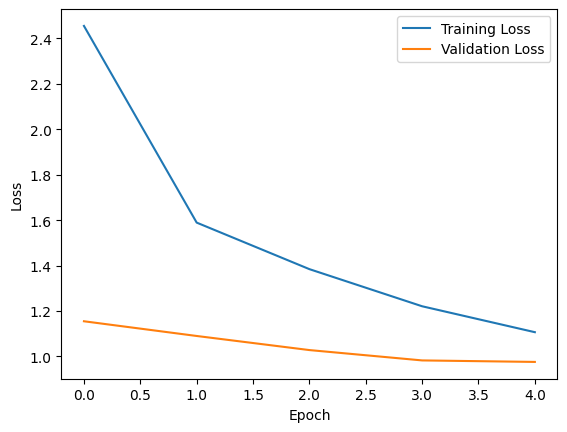

In [36]:
import matplotlib.pyplot as plt

# Assuming you've already created and compiled your model
model = collaborative_filtering_model(num_users, num_items, embedding_size=50)

# Train the model and get the training history
history = model.fit([train_data['user_idx'], train_data['movie_idx']], train_data['rating'], epochs=5, batch_size=64, validation_split=0.2)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


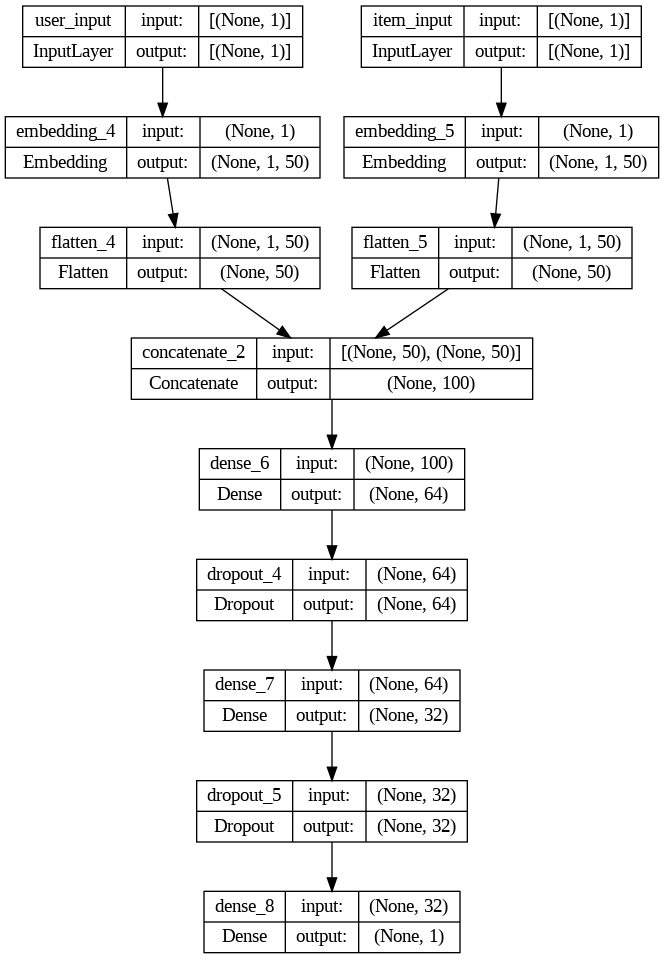

In [27]:
from tensorflow.keras.utils import plot_model

# Assuming you've already created and compiled your model
model = collaborative_filtering_model(num_users, num_items, embedding_size=50)

# Plot the model architecture
plot_model(model, to_file='collaborative_filtering_model.png', show_shapes=True, show_layer_names=True)


### without regulazation

In [37]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def collaborative_filtering_model_no_reg(num_users, num_items, embedding_size=50):
    user_input = Input(shape=(1,), name='user_input')
    item_input = Input(shape=(1,), name='item_input')

    user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size, input_length=1)(user_input)
    item_embedding = Embedding(input_dim=num_items, output_dim=embedding_size, input_length=1)(item_input)

    user_flat = Flatten()(user_embedding)
    item_flat = Flatten()(item_embedding)

    concatenated = Concatenate()([user_flat, item_flat])

    dense_1 = Dense(64, activation='relu')(concatenated)
    dropout_1 = Dropout(0.5)(dense_1)

    dense_2 = Dense(32, activation='relu')(dropout_1)
    dropout_2 = Dropout(0.5)(dense_2)

    output = Dense(1, activation='linear')(dropout_2)

    model = Model(inputs=[user_input, item_input], outputs=output)
    model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
    return model


In [38]:
uregularazed_model = collaborative_filtering_model_no_reg(num_users, num_items, embedding_size=embedding_size)

In [39]:
# Train the model
uregularazed_model.fit([train_data['user_idx'], train_data['movie_idx']], train_data['rating'], epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss = uregularazed_model.evaluate([test_data['user_idx'], test_data['movie_idx']], test_data['rating'])
print(f"Test Loss: {test_loss}")

Epoch 1/5
1009/1009 [==============================] - 10s 9ms/step - loss: 2.1305 - val_loss: 0.8666
Epoch 2/5
1009/1009 [==============================] - 9s 9ms/step - loss: 1.2794 - val_loss: 0.8198
Epoch 3/5
1009/1009 [==============================] - 9s 9ms/step - loss: 1.0878 - val_loss: 0.7920
Epoch 4/5
1009/1009 [==============================] - 9s 9ms/step - loss: 0.9487 - val_loss: 0.8040
Epoch 5/5
631/631 [==============================] - 1s 2ms/step - loss: 0.7889
Test Loss: 0.788884699344635


Epoch 1/5
1009/1009 [==============================] - 11s 10ms/step - loss: 0.9075 - val_loss: 0.9435
Epoch 2/5
1009/1009 [==============================] - 9s 9ms/step - loss: 0.9023 - val_loss: 0.9574
Epoch 3/5
1009/1009 [==============================] - 8s 7ms/step - loss: 0.9006 - val_loss: 0.9388
Epoch 4/5
1009/1009 [==============================] - 9s 9ms/step - loss: 0.8986 - val_loss: 0.9486
Epoch 5/5
1009/1009 [==============================] - 8s 8ms/step - loss: 0.9019 - val_loss: 0.9471


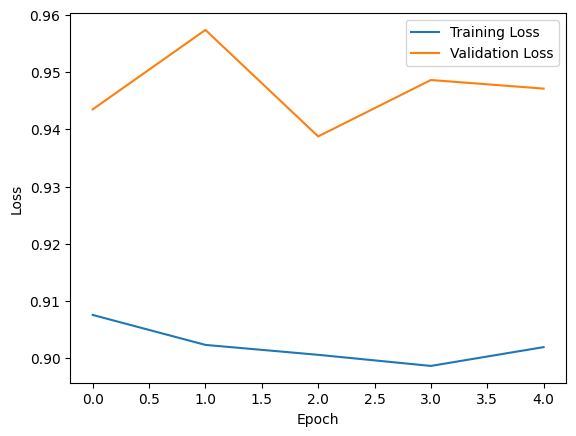

In [41]:
import matplotlib.pyplot as plt

# Assuming you've already created and compiled your model
uregularazed_model = collaborative_filtering_model_no_reg(num_users, num_items, embedding_size=50)

# Train the model and get the training history
history = model.fit([train_data['user_idx'], train_data['movie_idx']], train_data['rating'], epochs=5, batch_size=64, validation_split=0.2)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()